In [1]:
from qiskit_metal import designs, MetalGUI

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [2]:
design.chips.main.size_x = '14mm'
design.chips.main.size_y = '10mm'

In [3]:
gui = MetalGUI(design)

  warnings.warn('Selected binding "{}" could not be found, '



In [4]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
TransmonPocket.default_options

{'chip': 'main',
 'pos_x': '0um',
 'pos_y': '0um',
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'}}

In [5]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

design.delete_all_components()

design_span_x = 8
design_span_y = 4

half_chip_width = design_span_x // 2
half_chip_height = design_span_y // 2

connection_pads_options = dict(
    a = dict(loc_W=1, loc_H=-1),
    b = dict(loc_W=1, loc_H=1),
    c = dict(loc_W=-1, loc_H=-1)
)

transmons = []

transmons.append(TransmonPocketCL(design, 'Q1',
                      options=dict(pos_x=f'-{half_chip_width}mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   connection_pads=dict(**connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q2',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=-90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q3',
                      options=dict(pos_x=f'0mm',
                                   pos_y=f'{-half_chip_height}mm',
                                   orientation=90,
                                   connection_pads=dict(d=dict(loc_W=-1, loc_H=1), **connection_pads_options))))

transmons.append(TransmonPocketCL(design, 'Q4',
                      options=dict(pos_x=f'{half_chip_width}mm',
                                   pos_y=f'{half_chip_height}mm',
                                   orientation=180,
                                   connection_pads=dict(**connection_pads_options))))

gui.rebuild()
gui.autoscale()

In [6]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal import Dict

fillet='99.99um'
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)

def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', start_strght='0 um', end_strght='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight=start_strght,
            end_straight=end_strght
        ),
        total_length=length,
    fillet = '99.9um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)

asym_h = 100
asym_v = 100
cpw = []

cpw.append(connect('cpw1', 'Q2', 'a', 'Q1', 'b', '14851.48 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw2', 'Q3', 'b', 'Q2', 'b', '14705.88 um', f'-{asym_v}um', '1mm', '1mm'))
cpw.append(connect('cpw3', 'Q3', 'a', 'Q4', 'b', '14563.1 um', f'+{asym_h}um', '0.4mm', '0.2mm'))
cpw.append(connect('cpw4', 'Q3', 'd', 'Q1', 'a', '14423.07 um', f'-{asym_h}um', '0.1mm', '0.1mm'))
cpw.append(connect('cpw5', 'Q2', 'd', 'Q4', 'a', '14285.71 um', f'-{asym_h}um', '0.1mm', '0.1mm'))


gui.rebuild()
gui.autoscale()

In [7]:
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

readouts_lwc = []
control_lwc = []

offset_x = 0
offset_y = 1


#Readouts
readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = f'-{half_chip_height+offset_y}mm',
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R2',
                                         options = dict(
                                         pos_x = '-1mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R3',
                                         options = dict(
                                         pos_x = '1mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

readouts_lwc.append(LaunchpadWirebondCoupled(design, 'R4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = f'{half_chip_height+offset_y}mm',
                                         orientation = 180,
                                         lead_length = '30um')))

#Controls
control_lwc.append(LaunchpadWirebondCoupled(design, 'CL1',
                                         options = dict(
                                         pos_x = '-6mm',
                                         pos_y = '2mm',
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL2',
                                         options = dict(
                                         pos_x = '4mm',
                                         pos_y = '4mm',
                                         orientation = -90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL3',
                                         options = dict(
                                         pos_x = '-4mm',
                                         pos_y = '-4mm',
                                         orientation = 90,
                                         lead_length = '30um')))

control_lwc.append(LaunchpadWirebondCoupled(design, 'CL4',
                                         options = dict(
                                         pos_x = '6mm',
                                         pos_y = '-2mm',
                                         orientation = 180,
                                         lead_length = '30um')))

gui.rebuild()
gui.autoscale()

In [8]:
readout_lines = []

asym_14 = 1000
asym_23 = 1000
options = Dict(
    lead=Dict(
        start_straight='430um',
        end_straight='0um'),
    fillet='99.99um')

readout_lines.append(connect('ol1', 'Q1', 'c', 'R1', 'tie', '10mm', f'{asym_14}um'))
readout_lines.append(connect('ol2', 'Q2', 'c', 'R2', 'tie', '10mm', f'{asym_23}um'))
readout_lines.append(connect('ol3', 'Q3', 'c', 'R3', 'tie', '10mm', f'{asym_23}um'))
readout_lines.append(connect('ol4', 'Q4', 'c', 'R4', 'tie', '10mm', f'{asym_14}um'))

gui.rebuild()
gui.autoscale()

In [9]:
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors
from collections import OrderedDict
import numpy as np

control_lines = []

def connectRouteAnchor(name: str,
                       component1: str, pin1: str, component2: str, pin2: str,
                       anchor_points: OrderedDict) -> RouteAnchors:

    options_line_cl = dict(
        pin_inputs = dict(start_pin = dict(component = component1, pin = pin1),
                          end_pin = dict(component = component2, pin = pin2)),
        anchors = anchor_points,
        lead = dict(start_straight = '200um',
                    end_straight = '225um'),
        fillet = fillet
    )
    
    return RouteAnchors(design, name, options_line_cl)



anchors1c = OrderedDict()
anchors1c[0] = np.array([-5, -1.92])
anchors1c[1] = np.array([-5, 2])

control_lines.append(connectRouteAnchor('line_cl1', 'Q1', 'Charge_Line', 'CL1', 'tie', anchors1c))


anchors2c = OrderedDict()
anchors2c[0] = np.array([0.08, 3.25])
anchors2c[1] = np.array([4, 3.25])

control_lines.append(connectRouteAnchor('line_cl2', 'Q2', 'Charge_Line', 'CL2', 'tie', anchors2c))

anchors3c = OrderedDict()
anchors3c[0] = np.array([-0.08, -3.25])
anchors3c[1] = np.array([-4, -3.25])

control_lines.append(connectRouteAnchor('line_cl3', 'Q3', 'Charge_Line', 'CL3', 'tie', anchors3c))

anchors4c = OrderedDict()
anchors4c[0] = np.array([5, 1.92])
anchors4c[1] = np.array([5, -2])

control_lines.append(connectRouteAnchor('line_cl4', 'Q4', 'Charge_Line', 'CL4', 'tie', anchors4c))

gui.rebuild()
gui.autoscale()

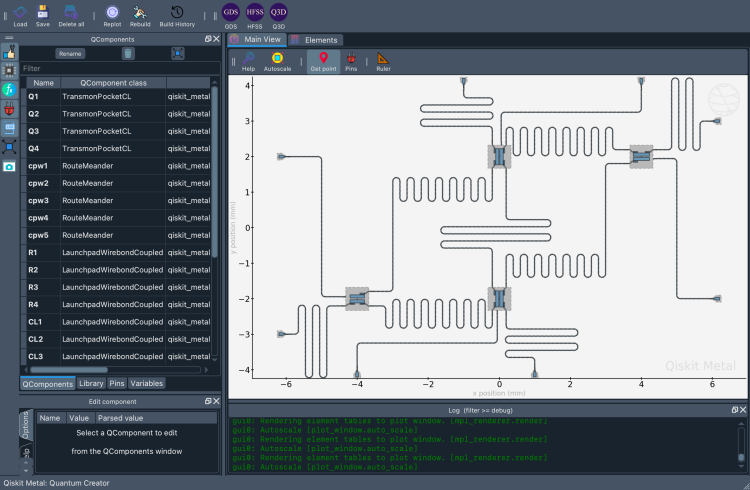

In [10]:
gui.screenshot()

In [36]:
# Qubit Frequencies
# Q1 : 5
# Q2 : 5.1
# Q3 : 5.2
# Q4 : 5.3

# CPW Frequencies
# cpw1 : 5.05
# cpw2 : 5.1
# cpw3 : 5.15
# cpw4 : 5.2
# cpw5 : 5.25

# Readout Frequencies
# R1 : 7
# R2 : 7.1
# R3 : 7.2
# R4 : 7.3

In [37]:
# CPW length calculator
freq = 5.25 * (10**9)
c = 3 * (10**8)
lamb = c / freq * (10**6)
lamb/4

14285.714285714284

In [38]:
q3d = design.renderers.q3d

In [39]:
q3d.options

{'Lj': '10nH',
 'Cj': 0,
 '_Rj': 0,
 'max_mesh_length_jj': '7um',
 'project_path': None,
 'project_name': None,
 'design_name': None,
 'ansys_file_extension': '.aedt',
 'x_buffer_width_mm': 0.2,
 'y_buffer_width_mm': 0.2,
 'wb_threshold': '400um',
 'wb_offset': '0um',
 'wb_size': 5,
 'plot_ansys_fields_options': {'name': 'NAME:Mag_E1',
  'UserSpecifyName': '0',
  'UserSpecifyFolder': '0',
  'QuantityName': 'Mag_E',
  'PlotFolder': 'E Field',
  'StreamlinePlot': 'False',
  'AdjacentSidePlot': 'False',
  'FullModelPlot': 'False',
  'IntrinsicVar': "Phase='0deg'",
  'PlotGeomInfo_0': '1',
  'PlotGeomInfo_1': 'Surface',
  'PlotGeomInfo_2': 'FacesList',
  'PlotGeomInfo_3': '1'}}

In [40]:
q3d.new_ansys_project()

In [ ]:
q3d.connect_ansys()

### LOM Analyses

#### Qubit (Q1)

In [42]:
transmons[0].options.pad_gap    = '40um'
transmons[0].options.pad_width  = '400um'
transmons[0].options.pad_height = '90um'

q3d.activate_q3d_design("Q1")
q3d.add_q3d_setup(name = 'Tune_Q1', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q1')
q3d.render_design(['Q1'], [('Q1', 'c'), ('Q1', 'a'),('Q1', 'b'),('Q1', 'Charge_Line')])
q3d.analyze_setup('Tune_Q1')
q3d.get_capacitance_matrix()

In [ ]:
Q1_lom = q3d.lumped_oscillator_vs_passes(12, 1, 4, 7, [5.2, 5.05, 5], 15)
q3d.plot_convergence_main(Q1_lom)
q3d.plot_convergence_chi(Q1_lom)

#### Qubit (Q2)

In [43]:
transmons[1].options.pad_gap    = '40um'
transmons[1].options.pad_width  = '420um'
transmons[1].options.pad_height = '90um'

q3d.activate_q3d_design("Q2")
q3d.add_q3d_setup(name = 'Tune_Q2', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q2')
q3d.render_design(['Q2'], [('Q2', 'c'), ('Q2', 'a'),('Q2', 'b'),('Q2', 'd'),('Q2', 'Charge_Line')])
q3d.analyze_setup('Tune_Q2')
q3d.get_capacitance_matrix()

In [43]:
Q2_lom = q3d.lumped_oscillator_vs_passes(12, 1, 5, 7.1, [5.05, 5.1, 5.25, 5.1], 15)
q3d.plot_convergence_main(Q2_lom)
q3d.plot_convergence_chi(Q2_lom)

#### Qubit (Q3)

In [43]:
transmons[2].options.pad_gap    = '40um'
transmons[2].options.pad_width  = '440um'
transmons[2].options.pad_height = '90um'

q3d.activate_q3d_design("Q3")
q3d.add_q3d_setup(name = 'Tune_Q3', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q3')
q3d.render_design(['Q3'], [('Q3', 'c'), ('Q3', 'a'),('Q3', 'b'),('Q3', 'd'),('Q3', 'Charge_Line')])
q3d.analyze_setup('Tune_Q3')
q3d.get_capacitance_matrix()

In [43]:
Q3_lom = q3d.lumped_oscillator_vs_passes(12, 1, 5, 7.3, [5.15, 5.1, 5.2, 5.2], 15)
q3d.plot_convergence_main(Q3_lom)
q3d.plot_convergence_chi(Q3_lom)

#### Qubit (Q4)

In [43]:
transmons[3].options.pad_gap    = '40um'
transmons[3].options.pad_width  = '460um'
transmons[3].options.pad_height = '90um'

q3d.activate_q3d_design("Q4")
q3d.add_q3d_setup(name = 'Tune_Q4', max_passes = 15, min_converged_passes = 5, percent_error = 0.05)
q3d.activate_q3d_setup('Tune_Q4')
q3d.render_design(['Q4'], [('Q4', 'c'), ('Q4', 'a'),('Q4', 'b'),('Q4', 'Charge_Line')])
q3d.analyze_setup('Tune_Q4')
q3d.get_capacitance_matrix()

In [43]:
Q4_lom = q3d.lumped_oscillator_vs_passes(12, 1, 4, 7.4, [5.25, 5.15, 5.3], 15)
q3d.plot_convergence_main(Q4_lom)
q3d.plot_convergence_chi(Q4_lom)